# Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System 


## Introduction


In this project we aim to gather information from the Spotify database. This information will help us understand how songs of different eras change overtime and will give us an analysis of the popular artists and songs. From there on we will use statistical tests to check how (or if) features contribute to popularity of songs and finally use different machine learning algorithms for prediction of song popularity and a simple song recommendation system that will recommend some songs from each genre that has given.

The main dataset, Spotify Dataset 1921-2020, 160k+ Tracks, for the project can be found from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).


In [1]:
# execute this cell to authorize the notebook
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [2]:
from os.path import join

path_prefix = "./drive/My Drive"
fname = "data.csv"

join(path_prefix, fname)

'./drive/My Drive/data.csv'

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

from pprint import pprint
from matplotlib import cm 
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

# Data Types in Data Set

In [78]:
df_data= pd.read_csv('./drive/My Drive/data.csv')

df_data.sort_values(by = "popularity", ascending = False).head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.105,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021


Describing Data
Enable to see each many statistics on each feature of our data like mean, min, max values.

In [79]:
df_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Getting data files and keeping them in dataframes. After that looking their features.

####Genres


We get data with their genres and keeping it inside `df_genre` datafreame. After that sorted data by popularity to see popular genres.

In [80]:
df_genre = pd.read_csv('./drive/My Drive/data_by_genres.csv')

df_genre.sort_values(by = "popularity", ascending = False).head(1)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
565,chinese electropop,0.00257,0.66,217088.0,0.787,0.0,0.323,-4.592,0.032,142.018,0.199,79.0,1,0


Describing Data
Enable to see each many statistics on each feature of our data like mean, min, max values.

In [81]:
df_genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


### Artists
We get data with their artists and keeping it inside df_artist datafreame. After that sorted data by popularity to see popular artists.

In [82]:
df_artist= pd.read_csv('./drive/My Drive/data_by_artist.csv')

df_artist.sort_values(by = "popularity", ascending = False).head(1)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4212,CJ,0.19,0.711,123429.0,0.598,0.0,0.15,-7.621,0.182,140.175,0.737,94.0,3,0,2


Describing Data
Enable to see each many statistics on each feature of our data like mean, min, max values.

In [9]:
df_artist.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


### Year
We get data with their artists and keeping it inside df_year datafreame. After that sorted data by popularity to see popular years.

In [83]:
df_year= pd.read_csv('./drive/My Drive/data_by_year.csv')

df_year.sort_values(by = "popularity", ascending = False).head(1)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
81,2001,0.267872,0.591808,240599.795107,0.643277,0.101968,0.191315,-7.906469,0.084505,118.338902,0.557982,50.873598,9,1


Describing Data
Enable to see each many statistics on each feature of our data like mean, min, max values.

In [11]:
df_year.describe()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


### Songs with their genres

In [84]:
df_W_genres= pd.read_csv('./drive/My Drive/data_w_genres.csv')

df_W_genres.sort_values(by = "popularity", ascending = False).head(1)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
4212,CJ,0.19,0.711,123429.0,0.598,0.0,0.15,-7.621,0.182,140.175,0.737,94.0,3,0,2,[]


Describing Data
Enable to see each many statistics on each feature of our data like mean, min, max values.

In [13]:
df_W_genres.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


# Visualizations of Aggregated Forms Based on Features

In [14]:
df_years_list = []
df_years_popularity = []
df_year_dict = {}
count = 0
sum = 0
decade = 1920
for row in df_year.itertuples():
  sum += row.popularity
  if((count+1) % 10 == 0):
    df_years_list.append(decade)
    df_years_popularity.append(sum / 10)
    df_year_dict[decade] = sum / 10
    decade += 10
    sum = 0
  count += 1

df_year_dict[2020] = sum / 2
df_years_list.append(2020)
df_years_popularity.append(sum / 2)
print(df_years_list)
print(df_years_popularity)


  

[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
[1.3517080750337083, 2.452390340190635, 1.7859748504790889, 10.7237, 26.475711918138995, 34.54598192622783, 36.96065836847199, 43.132789885894084, 43.68161605293727, 29.795335528679953, 15.907642489013996]


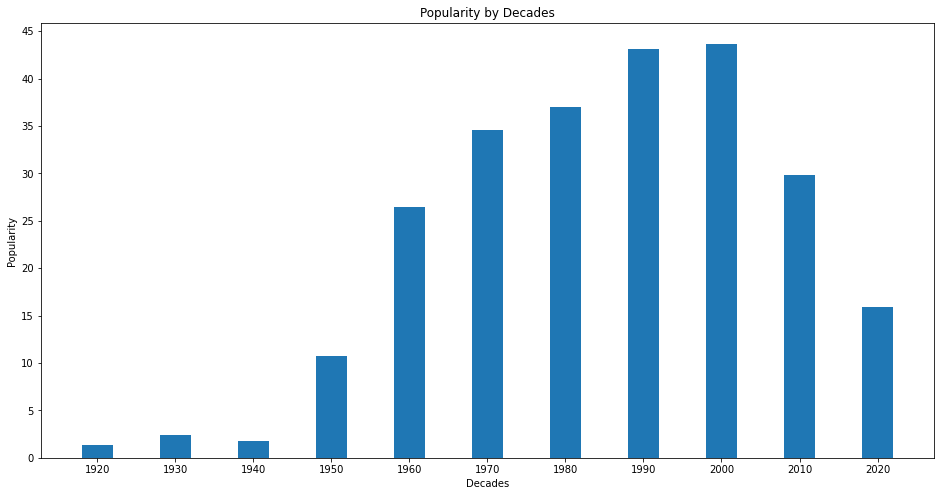

In [15]:
plt.figure(figsize = (16,8))
plt.bar(df_years_list, df_years_popularity, width = 4)
plt.xticks(df_years_list) 
plt.yticks(list(i for i in range(0,50,5)))
plt.xlabel("Decades")
plt.ylabel("Popularity")
plt.title("Popularity by Decades")
plt.show()

As we can see, songs from 80's, 90's and 2000's are pretty popular while old songs from 1920's to 1950's are not that popular. 

### Analysis of the Most Popular Artists and Songs

In [16]:
df_data['artists'] = df_data['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df_data = df_data.explode('artists')

In [17]:
merged = pd.merge(df_data, df_W_genres, on="artists")
df = merged

In [18]:
merged['genres'] = merged['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
merged = merged.explode('genres')

In [19]:
popular_genres = df_genre.sort_values(by = "popularity", ascending = False).head(20)["genres"].tolist() 

songs_with_popularGenres = merged['genres'].isin(popular_genres)
popular_songsOfGenres = merged[songs_with_popularGenres]


**This graph analyses most popular 20 genres' number of songs.**





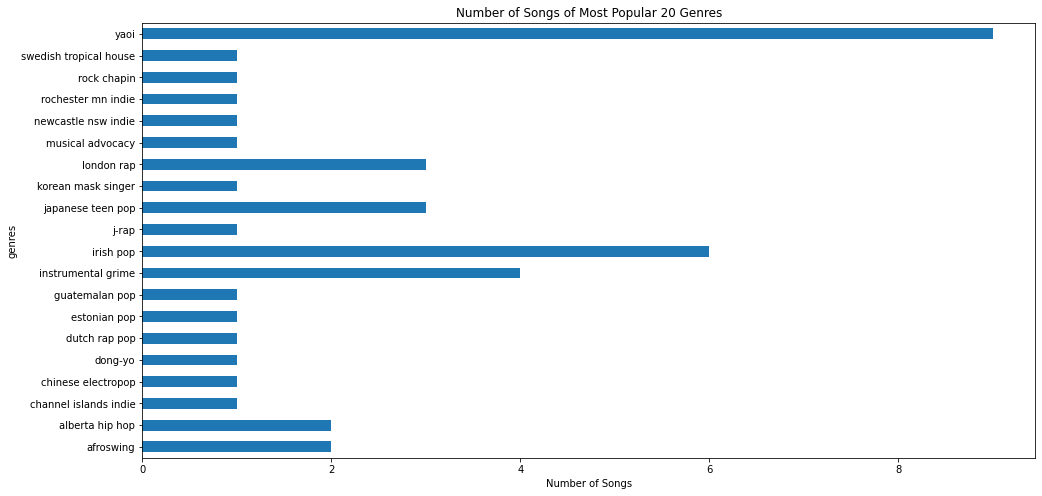

In [20]:
plt.figure(figsize = (16,8))
plt.xlabel("Number of Songs")
plt.title("Number of Songs of Most Popular 20 Genres")
popular_songsOfGenres.groupby('genres').size().plot(kind = "barh");

In [21]:
popular_songs75 = popular_songsOfGenres['popularity_x'] > 75.00
popular_songs_of_popular_genres = popular_songsOfGenres[popular_songs75]


**This graph shows Most popular 20 genres' songs with more than 75 popularity.**

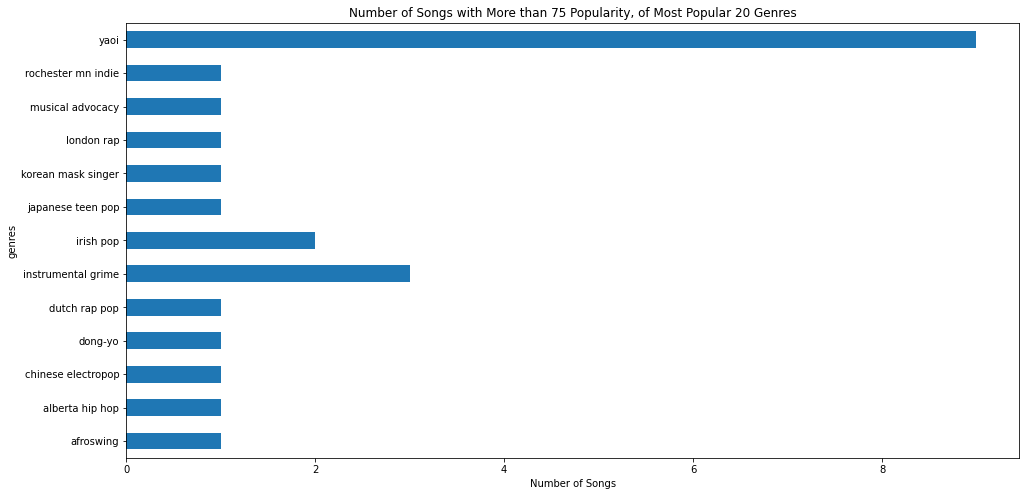

In [22]:
plt.figure(figsize = (16,8))
plt.xlabel("Number of Songs")
plt.title("Number of Songs with More than 75 Popularity, of Most Popular 20 Genres")
popular_songs_of_popular_genres.groupby('genres').size().plot(kind = "barh");

**This graph shows danceability values of the most popular 20 artists.**

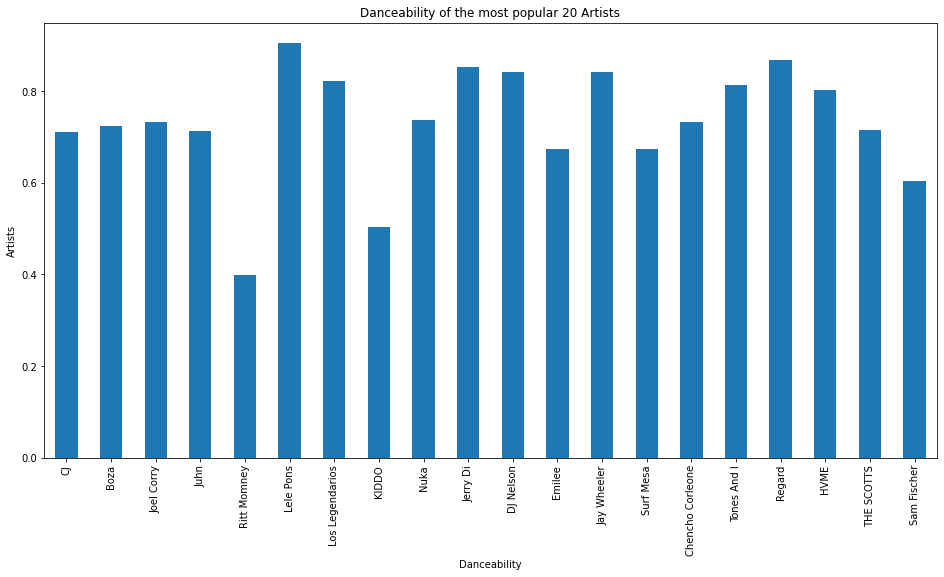

In [23]:
#popular_artists = df_artist.sort_values(by = "popularity", ascending = False).head(20)["artists"].tolist()
popular_artists_20 = df_artist.sort_values(by = "popularity", ascending = False).head(20)
popular_artists_20.plot(x = "artists", y = "danceability", kind = "bar", legend = False, figsize = (16,8));
plt.xlabel("Danceability")
plt.ylabel("Artists")
plt.title("Danceability of the most popular 20 Artists");


### How Songs of Different Genres Change Over Time

We analyze changes of different genres over time. Firstly we show popularity and speechiness of pop songs throught years. Secondly we show popularity and speechiness of latin songs throught years. Finally we compare them on the same graph and see the differences in the popularity and speechiness throught years. We grouped the songs according to their debut years.

In [24]:
pop_songs = merged['genres'] == "pop"

pop_songs = merged[pop_songs]

In [25]:
pop_songs_meanyears = pop_songs.groupby("year").mean()
pop_songs_meanyears = pop_songs_meanyears.drop(2021)


In [26]:
latin_songs = merged['genres'] == "latin"

latin_songs = merged[latin_songs]

In [27]:
latin_songs_meanyears = latin_songs.groupby("year").mean()
latin_songs_meanyears = latin_songs_meanyears.drop(2021)

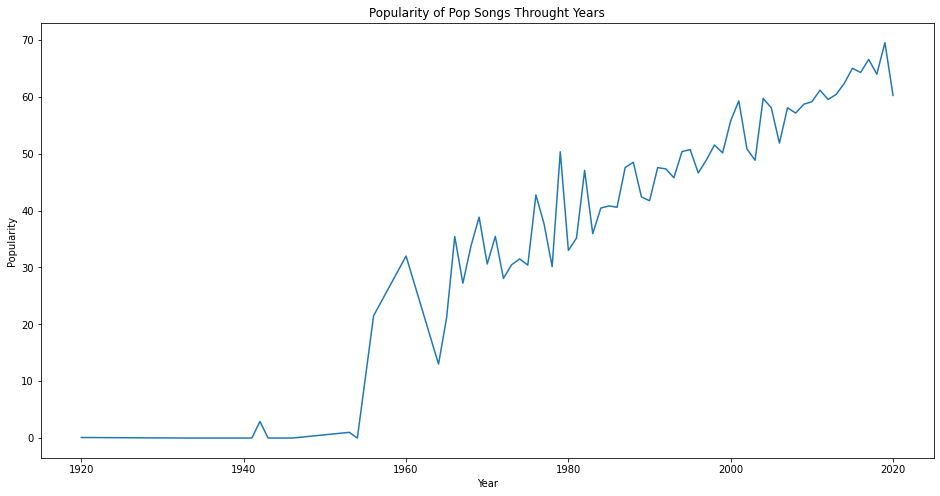

In [28]:
ts_pop_p = pd.Series(data = pop_songs_meanyears["popularity_x"])
ts_pop_p.plot(figsize = (16,8), xlabel = "Year", ylabel = "Popularity", title = "Popularity of Pop Songs Throught Years");

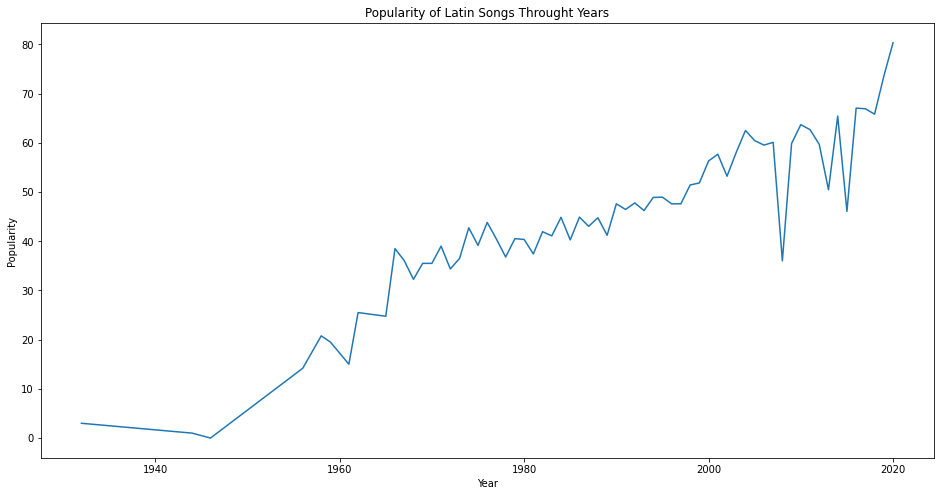

In [29]:
ts_latin_p = pd.Series(data = latin_songs_meanyears["popularity_x"])
ts_latin_p.plot(figsize = (16,8), xlabel = "Year", ylabel = "Popularity", title = "Popularity of Latin Songs Throught Years");

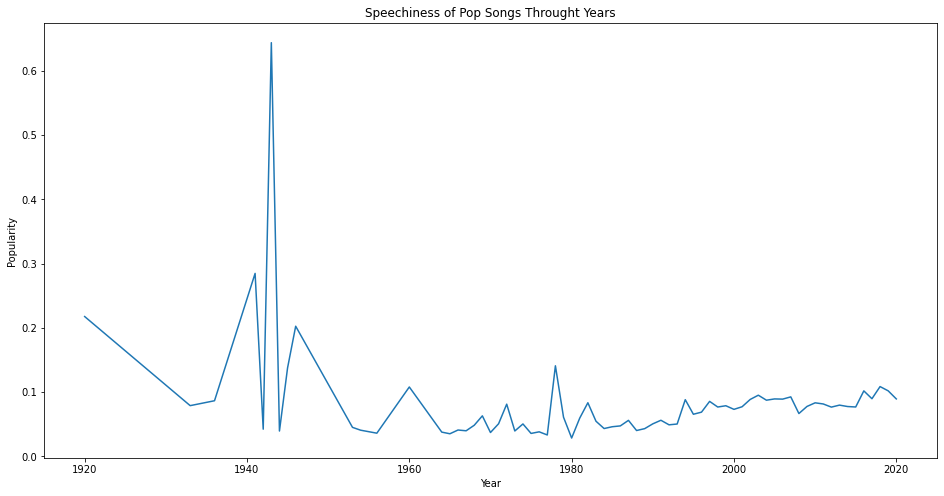

In [30]:
ts_pop_s = pd.Series(data = pop_songs_meanyears["speechiness_x"])
ts_pop_s.plot(figsize = (16,8), xlabel = "Year", ylabel = "Popularity", title = "Speechiness of Pop Songs Throught Years");

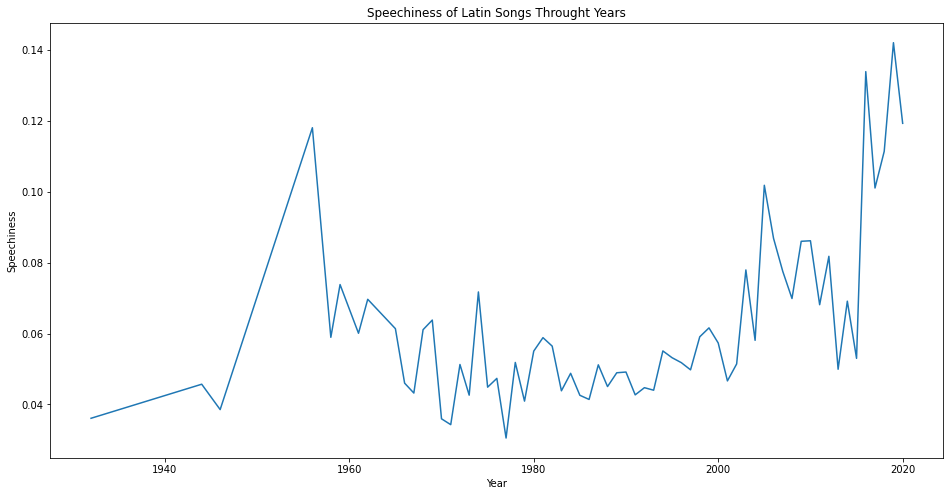

In [31]:
ts_latin_s = pd.Series(data = latin_songs_meanyears["speechiness_x"])
ts_latin_s.plot(figsize = (16,8), xlabel = "Year", ylabel = "Speechiness", title = "Speechiness of Latin Songs Throught Years");

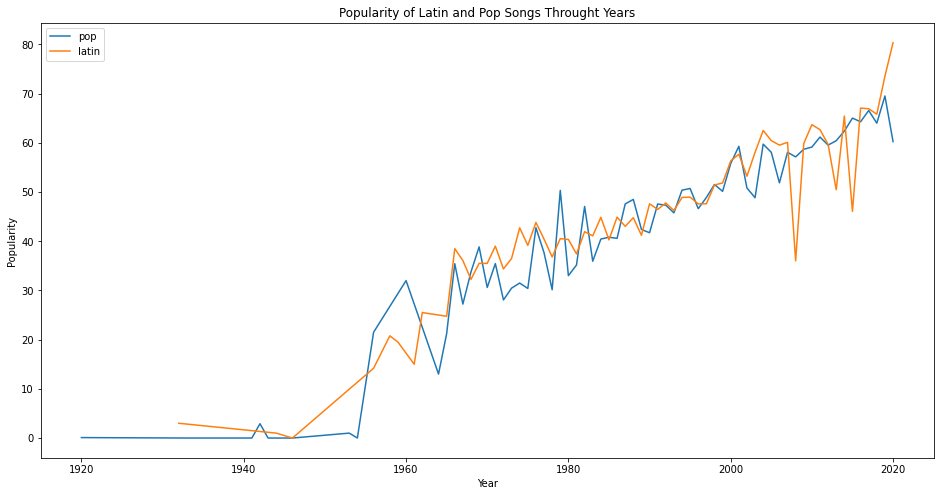

In [32]:
ts_pop_p = pd.Series(data = pop_songs_meanyears["popularity_x"])
ts_pop_p.plot(figsize = (16,8), xlabel = "Year", label = "pop", ylabel = "Popularity", legend = "true");

ts_latin_p = pd.Series(data = latin_songs_meanyears["popularity_x"])
ts_latin_p.plot(figsize = (16,8), xlabel = "Year", label = "latin", ylabel = "Popularity", title = "Popularity of Latin and Pop Songs Throught Years", legend = "true");

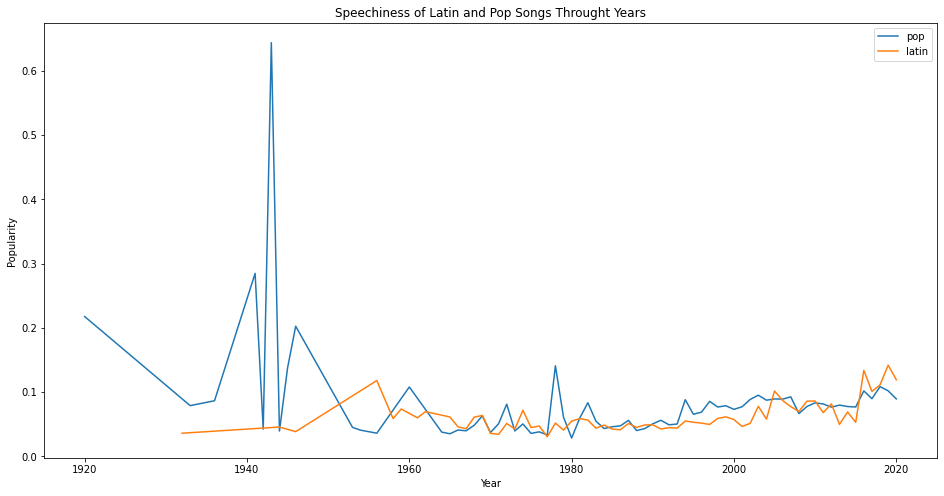

In [33]:
ts_pop_s = pd.Series(data = pop_songs_meanyears["speechiness_x"])
ts_pop_s.plot(figsize = (16,8), xlabel = "Year", label = "pop", ylabel = "Popularity", legend = "true");

ts_latin_s = pd.Series(data = latin_songs_meanyears["speechiness_x"])
ts_latin_s.plot(figsize = (16,8), xlabel = "Year", label = "latin", ylabel = "Popularity", title = "Speechiness of Latin and Pop Songs Throught Years", legend = "true");

# Correlation Matrix


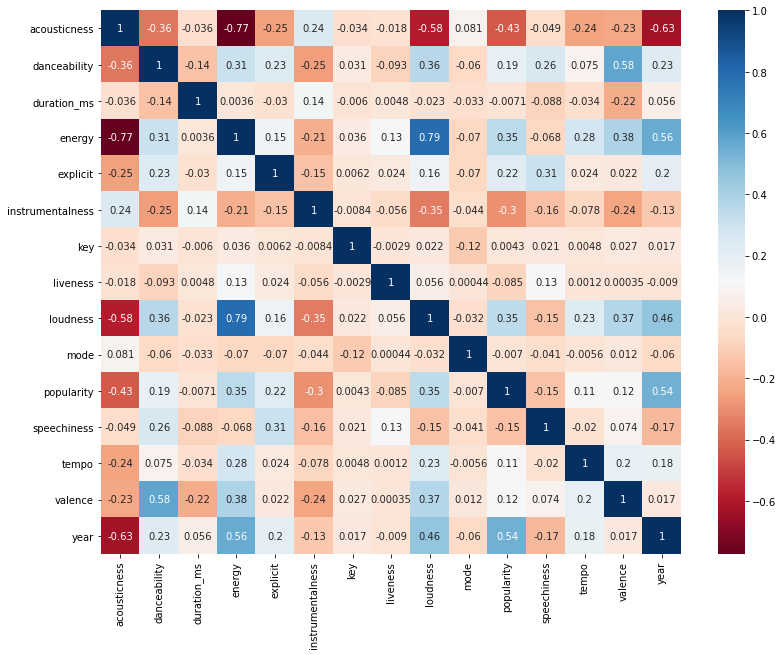

In [34]:
plt.figure(figsize=(13, 10))
corr = df_data.corr()
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)


#**Hypothesis Testing**

##Hypothesis Test 1

**Null Hypothesis ($H_0$):** `speechiness` has no effect on `popularity` of the song.

\

**Alternative Hypothesis ($H_A$)**: `speechiness` has effect on `popularity` of the song.

\

Testing Prosedure:

We will analyze hypothesis as dividing the group into 3 subgroups. $1^{st}$ is songs with less than `50` on the `popularity` scale and $2^{nd}$ is songs with between `50-80` on the `popularity` scale , $3^{rd}$ is songs that has more than or equal to `80` on `popularity` scale. Making subgroups from the crucial points makes it clearer to show.


In [35]:
sample_1 = df_data[df_data['popularity'] < 50]

sample_2 = df_data[(df_data['popularity'] >= 50) & (df_data['popularity'] < 80)]

sample_3 = df_data[df_data['popularity'] >= 80] 

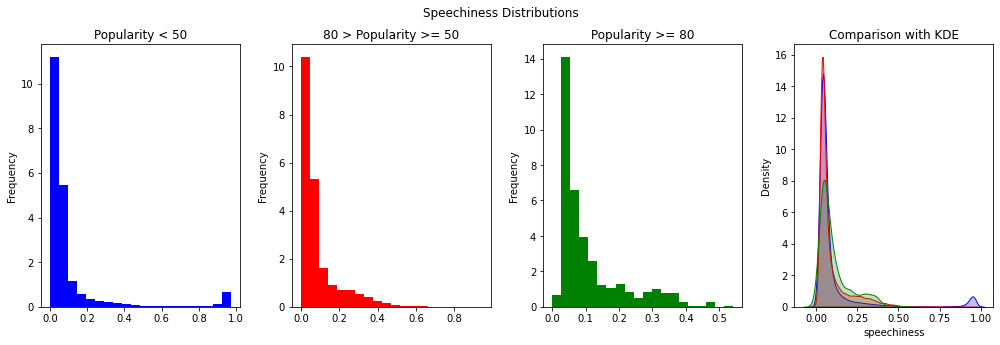

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
sample_1['speechiness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="b", density=True)
ax[0].set_title("Popularity < 50") 

sample_2['speechiness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="r", density=True)
ax[1].set_title("80 > Popularity >= 50")

sample_3['speechiness'].plot(kind="hist", ax=ax[2], bins=20, label="none", color="green", density=True)
ax[2].set_title("Popularity >= 80")

sns.kdeplot(sample_1['speechiness'], shade=True, label="Popularity < 50", ax=ax[3], color="b")
sns.kdeplot(sample_2['speechiness'], shade=True, label="80 > Popularity >= 50", ax=ax[3], color="r")
sns.kdeplot(sample_3['speechiness'], shade=True, label="Popularity >= 80", ax=ax[3], color="green")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Speechiness Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [37]:
f_stats, p_values = f_oneway(sample_1['speechiness'].values, sample_2['speechiness'].values, sample_3['speechiness'].values)

print("p-value: ",format(p_values,".2E"))

if (p_values < 0.05):
  print("Current value of p value suggests we reject null hypothesis, speechiness does affects popularity.")
else:
  print("Current value of p value suggests we cannot reject null hypothesis, speechiness does not affects popularity.")

p-value:  7.12E-62
Current value of p value suggests we reject null hypothesis, speechiness does affects popularity.


**Interpreting results**

As p-value we obtained is smaller than the threshold significance level `0.05`, we can conclude that speechiness does affects popularity of the songs. Here, we reject the null hypothesis.

##Hypothesis Test 2

**Null Hypothesis ($H_0$):** `loudness` has no effect on `energy` of the song.

\

**Alternative Hypothesis ($H_A$)**: `loudness` has effects on `energy` of the song.

\

Testing Prosedure:

There are two groups divided by their energy values, $1^{st}$ group is songs that has energy less than the median value of our data. $2^{nd}$ group is songs that has more than or equal to the median value of our data.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


In [38]:
median_value = df_data['energy'].median()

sample_e1 = df_data[df_data['energy'] < median_value]

sample_e2 = df_data[df_data['energy'] >= median_value] 

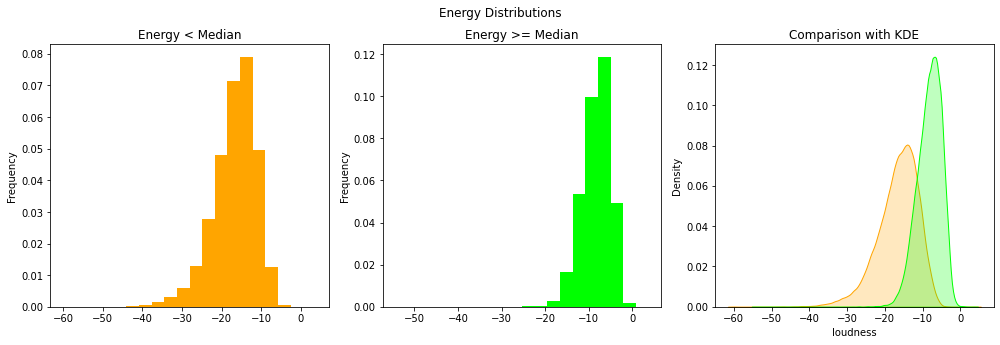

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_e1['loudness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="orange", density=True)
ax[0].set_title("Energy < Median") 

sample_e2['loudness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="lime", density=True)
ax[1].set_title("Energy >= Median")


sns.kdeplot(sample_e1['loudness'], shade=True, label="Energy < Median", ax=ax[2], color="orange")
sns.kdeplot(sample_e2['loudness'], shade=True, label="Energy >= Median", ax=ax[2], color="lime")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [40]:
f_stats, p_values = stats.ttest_ind(sample_e1['loudness'].values, sample_e2['loudness'].values, equal_var= False)

print("p-value: ",format(p_values,".3E"))

if (p_values < 0.05):
  print("Current value of p-value suggests we reject null hypothesis, loudness does affect energy.")
else:
  print("Current value of p-value suggests we cannot reject null hypothesis, loudness does not affects energy.")

p-value:  0.000E+00
Current value of p-value suggests we reject null hypothesis, loudness does affect energy.


**Interpreting results**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that loudness does affects energy of the song. Here, we reject the null hypothesis.

##Hypothesis Test 3

**Null Hypothesis**

\

`liveness` has no effect on `popularity` of the song.

\

Testing Prosedure:
\
We will analyze hypothesis as dividing the group into 3 subgroups. $1^{st}$ is songs with less than 50 on the `popularity` scale and $2^{nd}$ is songs with between 50 and 80 on `popularity` scale and $3^{rd}$ group if more than 80 on `popularity` scale. Making subgroups from the crucial points makes it easily divisible by `popularity`.


In [41]:
sample_a1 = df_data[df_data['popularity'] < 50]

sample_a2 = df_data[(df_data['popularity'] >= 50) & (df_data['popularity'] < 80)]

sample_a3 = df_data[df_data['popularity'] >= 80] 

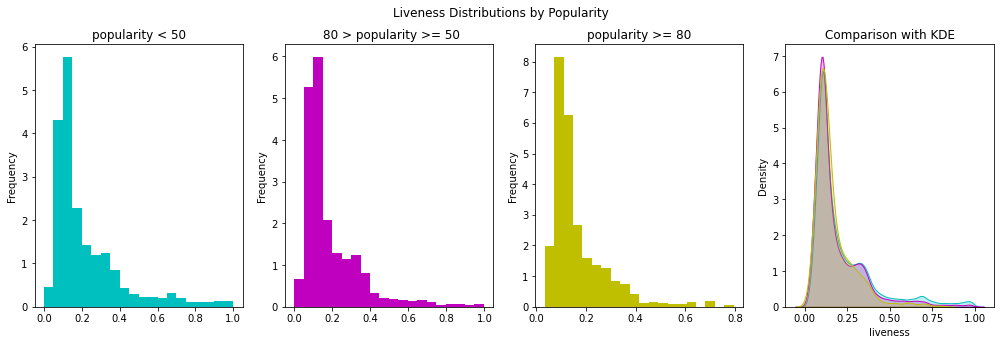

In [42]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
sample_a1['liveness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("popularity < 50") 

sample_a2['liveness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title(" 80 > popularity >= 50")

sample_a3['liveness'].plot(kind="hist", ax=ax[2], bins=20, label="none", color="y", density=True)
ax[2].set_title("popularity >= 80")

sns.kdeplot(sample_a1['liveness'], shade=True, label="popularity < 50", ax=ax[3], color="c")
sns.kdeplot(sample_a2['liveness'], shade=True, label="80 > popularity >= 50", ax=ax[3], color="m")
sns.kdeplot(sample_a3['liveness'], shade=True, label="popularity >= 80", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Liveness Distributions by Popularity")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [43]:
f_stats, p_values = f_oneway(sample_a1['liveness'].values, sample_a2['liveness'].values, sample_a3['liveness'].values)

print(p_values)

5.606384422790301e-207


**Interpreting results**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that liveness does affects popularity of the song. Here, we reject the null hypothesis.

##Hypothesis Test 4

**Null Hypothesis**

\

`liveness` has no effect on `mode` of the song.

\

Testing Prosedure:
\
We will analyze hypothesis as dividing the group into 2 subgroups. First group is songs that has `mode` equals to 0 second group is songs that has `mode` equals to 1. Making subgroups for the two options of `mode` makes it clearer to show.


In [44]:
sample_m1 = df_data[df_data['mode'] == 0]

sample_m2 = df_data[df_data['mode'] == 1]


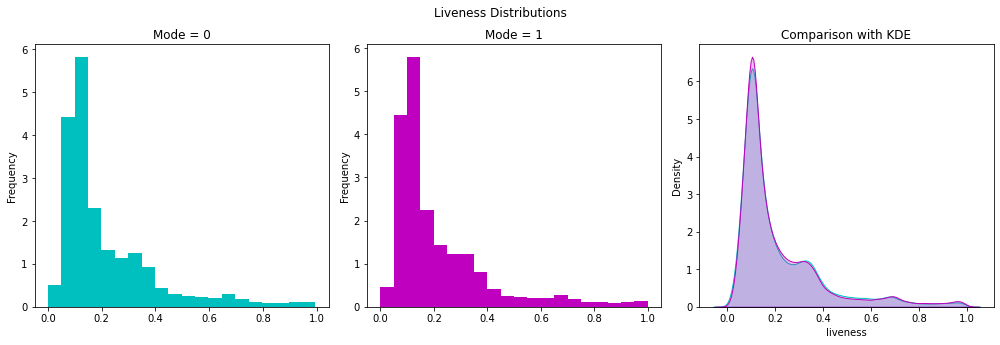

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_m1['liveness'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Mode = 0") 

sample_m2['liveness'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Mode = 1")

sns.kdeplot(sample_m1['liveness'], shade=True, label="Mode = 0", ax=ax[2], color="c")
sns.kdeplot(sample_m2['liveness'], shade=True, label="Mode = 1", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Liveness Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
f_stats, p_values = stats.ttest_ind(sample_m1['liveness'].values, sample_m2['liveness'].values, equal_var = False)

print(p_values)

0.8314944277185045


**Interpreting results**

As p-value we obtained is bigger than the threshold significance level 0.05, we can conclude that liveness does not affects mode of the song. Here, we cannot reject the null hypothesis.

##Hypothesis Test 5

**Null Hypothesis**

\

Decades has no effect on popularity of pop songs.

\

Testing Prosedure:
\
We will analyze hypothesis as taking 3 sample decades namely `1980's`,`1990's ` and `2000's` pop songs. Making subgroups for the different decades' `popularity` shows about difference of decades in popularity


In [47]:
sample_pop0 = pop_songs[(pop_songs['year'] >= 1980) & (pop_songs['year'] < 1990)]

sample_pop1 = pop_songs[(pop_songs['year'] >= 1990) & (pop_songs['year'] < 2000)]

sample_pop2 = pop_songs[(pop_songs['year'] >= 2000) & (pop_songs['year'] < 2010)]

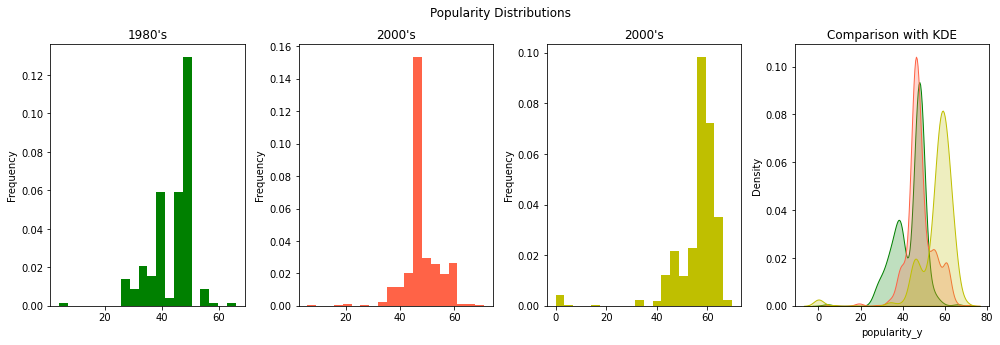

In [48]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
sample_pop0['popularity_y'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="g", density=True)
ax[0].set_title("1980's") 

sample_pop1['popularity_y'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="tomato", density=True)
ax[1].set_title("2000's")

sample_pop2['popularity_y'].plot(kind="hist", ax=ax[2], bins=20, label="completed", color="y", density=True)
ax[2].set_title("2000's")

sns.kdeplot(sample_pop0['popularity_y'], shade=True, label="1980's", ax=ax[3], color="g")
sns.kdeplot(sample_pop1['popularity_y'], shade=True, label="1990's", ax=ax[3], color="tomato")
sns.kdeplot(sample_pop2['popularity_y'], shade=True, label="2000's", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [49]:
f_stats, p_values = f_oneway(sample_pop0['popularity_y'].values, sample_pop1['popularity_y'].values, sample_pop2['popularity_y'].values)

print(p_values)

2.701825034997949e-119


**Interpreting results**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that decades does affects popularity of pop songs. Here, we reject the null hypothesis.

#**Machine Learning**

##KNN

In [50]:
df_knn = df_data.drop(["artists", "duration_ms", "explicit", "id", "key", "mode", "name", "release_date", "valence"], axis = 1)

In [51]:
def encode(row):
    if (row["popularity"] <= 20):
      return "0"
    elif (row["popularity"] <= 40):
      return "1"
    elif (row["popularity"] <= 60):
      return "2"
    elif (row["popularity"] <= 80):
      return "3"
    else:
      return "4"

df_knn["popularity"] = df_knn.apply(encode, axis = 1)
df_knn["popularity"] = df_knn["popularity"].astype(int)

In [52]:
X = df_knn.drop("popularity", axis = 1)
y = df_knn["popularity"]

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

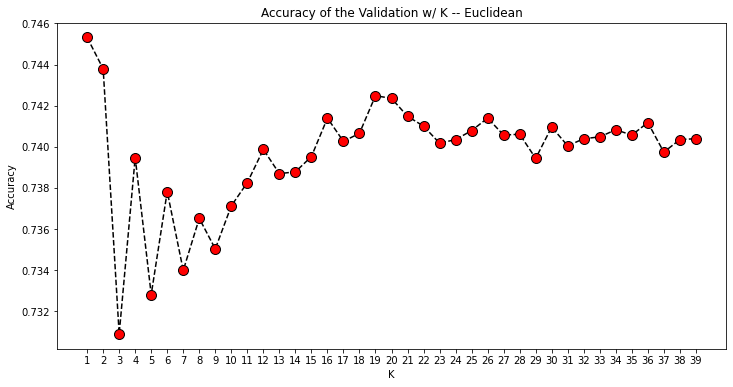

In [54]:
K_range = np.arange(1, 40)
accuracy_list1 = []

for k in K_range:
  knn = KNeighborsClassifier(k, metric="euclidean")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list1.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list1, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K -- Euclidean')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.show()

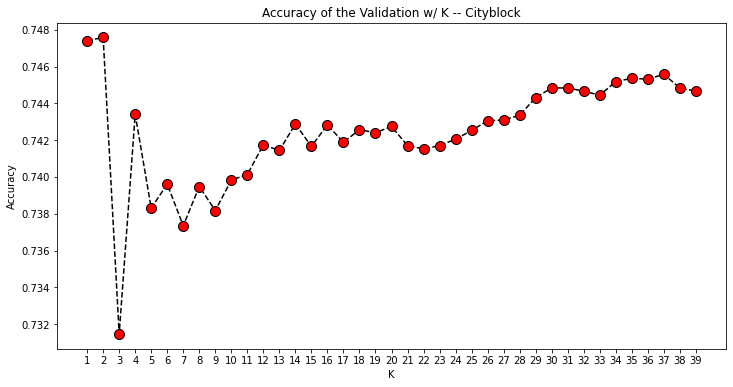

In [55]:
accuracy_list2 = []

for k in K_range:
  knn = KNeighborsClassifier(k, metric="cityblock")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list2.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list2, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K -- Cityblock')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.show()

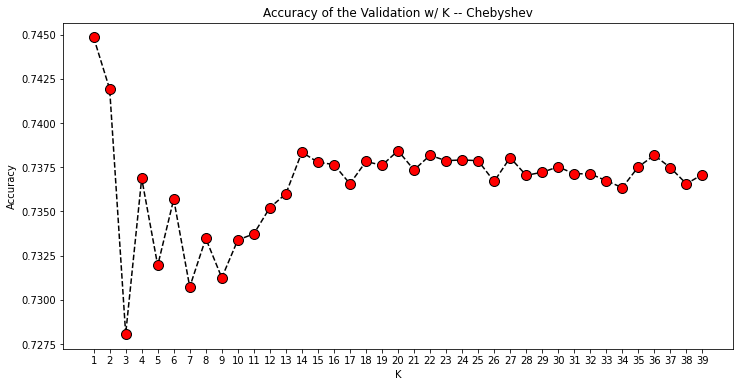

In [56]:
accuracy_list3 = []

for k in K_range:
  knn = KNeighborsClassifier(k, metric="chebyshev")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list3.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list3, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K -- Chebyshev')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.show()

In [57]:
max_value1 = max(accuracy_list1)
max_index1 = accuracy_list1.index(max_value1)
print(max_index1)
print(max_value1)

0
0.7453167203973163


In [58]:
max_value2 = max(accuracy_list2)
max_index2 = accuracy_list2.index(max_value2)
print(max_index2)
print(max_value2)

1
0.7475821207632657


In [59]:
max_value3 = max(accuracy_list3)
max_index3 = accuracy_list3.index(max_value3)
print(max_index3)
print(max_value3)

0
0.7448375010891348


In [60]:
knn = KNeighborsClassifier(37, metric="cityblock")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7455781127472336

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [63]:
knn = KNeighborsClassifier(37, metric="cityblock")
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7320292759431908

In [64]:
knn = KNeighborsClassifier(37, metric="cityblock")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.743748366297813

In [65]:
knn = KNeighborsClassifier(37, metric="cityblock")
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7356887688420319

Knn algorithm gives us an accuracy of %74.3 when predicting a songs popularity using its features.

##Random Forest

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
max_acc=-1
index=-1
for i in range(1,26):
  rf  = RandomForestClassifier(max_depth=i)
  
  rf.fit(X_train, y_train)
  pred_rf = rf.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred_rf)
  print("Accuracy of the random forest model: ",acc,"best at depth",i)
  if max_acc < acc:
    max_acc=acc
    index=i
  
print("Accuracy of the random forest model: ",max_acc,"best at depth",index)

Accuracy of the random forest model:  0.5360982835235689 best at depth 1
Accuracy of the random forest model:  0.6056112224448897 best at depth 2
Accuracy of the random forest model:  0.6860329354360896 best at depth 3
Accuracy of the random forest model:  0.7192646161888996 best at depth 4
Accuracy of the random forest model:  0.7335889169643635 best at depth 5
Accuracy of the random forest model:  0.7401411518689553 best at depth 6
Accuracy of the random forest model:  0.7461008974470681 best at depth 7
Accuracy of the random forest model:  0.7511370567221399 best at depth 8
Accuracy of the random forest model:  0.7532107693648166 best at depth 9
Accuracy of the random forest model:  0.7573233423368476 best at depth 10
Accuracy of the random forest model:  0.7623595016119195 best at depth 11
Accuracy of the random forest model:  0.7665940576805785 best at depth 12
Accuracy of the random forest model:  0.771577938485667 best at depth 13
Accuracy of the random forest model:  0.77776422

Random Forest algorithm gives us an accuracy of %81.3 when predicting a songs popularity using its features.

In [68]:
rf=RandomForestClassifier(max_depth=index)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf.feature_importances_

array([0.10740479, 0.06340114, 0.0762979 , 0.07115884, 0.06181559,
       0.08248808, 0.06951909, 0.06350847, 0.40440609])

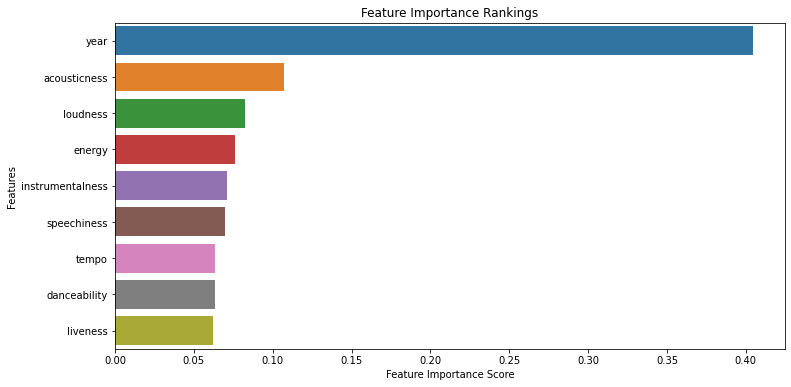

In [69]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

As we can see year is the most important metric when we are trying to predict a songs' popularity 

## Results of Machine Learning

We got an accuracy of %74.3 from knn algorithm and an accuracy of %81.3 from Random Forest algorithm. Although there is a %7 difference in accuracy levels of these algorithms, Random Forest algorithm runs significantly slower than the Knn algorithm. So the %7 increase in accuracy comes with the price of time even though Knn algorithm goes to $40^{th}$ depth while Random Forest algorithm goes to $25^{th}$ depth. 

#Recommending A Song

We simulate getting an input from a user by creating a random 10 sized sample list in the beginning. We will create a new column `points` that will be the point of a song based on the given input. `points` of a song will be the sum of (`input_feature_mean` - `songs_feature`)'s absolute values. This way the songs with lowest point will be the closest songs to our input's list. Our code recommends 2 songs with lowest points from each genre that way user can enjoy the genre's they like and feel similar to the songs in their list. 

In [70]:
merged.dropna(subset = ["genres"], inplace=True)

In [71]:
df_input = merged.sample(n=10)
df_input = df_input.drop_duplicates(["name"])
df_input.head(3)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
168838,0.00341,Luke Bond,0.510,72720,0.912,0,0iozTWghsHjVPvbzSMOgul,0.0417,6,0.207,-7.085,1,Revolution (Mixed),23,2019-12-13,0.045,132.030,0.344,2019,0.013822,0.457056,103323.500000,0.914389,0.100732,0.403233,-6.015278,0.115567,134.949833,0.407567,14.222222,2,0,18,progressive house
78255,0.18300,Otis Redding,0.595,162187,0.475,0,2Rxeg3MLGyLrSTWYg8d5Y5,0.0000,10,0.717,-8.829,1,"Any Ole Way - Live at the Whisky a Go Go, 1968...",19,1965-09-15,0.049,126.541,0.811,1965,0.447491,0.631824,175667.218954,0.389045,0.012261,0.192973,-11.391278,0.052822,129.027386,0.626025,33.679739,9,1,306,soul
7354,0.35600,Louis Armstrong,0.418,310027,0.932,0,7igTORFCLUx9ybMdwIgIHL,0.6720,7,0.979,-10.073,0,Royal Garden Blues,5,1955,0.500,124.251,0.450,1955,0.793341,0.547300,230661.335835,0.282188,0.089341,0.268447,-12.990038,0.096109,112.034039,0.526732,20.806754,0,1,533,swing


In [72]:
input_genres = df_input["genres"].unique()
songs_with_inputGenres = merged['genres'].isin(input_genres)
input_songsOfGenres = merged[songs_with_inputGenres].copy()

input_genres

array(['progressive house', 'soul', 'swing', 'vintage swedish pop',
       'classic rock', 'classic country pop', 'country', 'quiet storm',
       'outsider', 'orchestral performance'], dtype=object)

In [73]:
acousticness_mean = df_input["acousticness_x"].mean()
loudness_mean = df_input["loudness_x"].mean() / 60
energy_mean = df_input["energy_x"].mean()
instrumentalness_mean = df_input["instrumentalness_x"].mean()
speechiness_mean = df_input["speechiness_x"].mean()
danceability_mean = df_input["danceability_x"].mean()


In [74]:
def point(row):
  return abs(row["acousticness_x"] - acousticness_mean) + abs(row["loudness_x"]/60- loudness_mean) + abs(row["energy_x"] - energy_mean) + abs(row["instrumentalness_x"] - instrumentalness_mean)
  + abs(row["speechiness_x"] - speechiness_mean) + abs(row["danceability_x"] - danceability_mean)


input_songsOfGenres["point"] = input_songsOfGenres.apply(point, axis = 1)
input_songsOfGenres["point"] = input_songsOfGenres["point"].astype(float)

recommend = input_songsOfGenres.sort_values(by = "point", ascending = True).groupby("genres").head(2)

recommend = recommend.drop_duplicates(["name"])


In [75]:
print("Your current song list is: ", "\n")
for row in df_input.itertuples():
  print(row.name + " by " + row.artists)

Your current song list is:  

Revolution (Mixed) by Luke Bond
Any Ole Way - Live at the Whisky a Go Go, 1968; 2008 Remaster by Otis Redding
Royal Garden Blues by Louis Armstrong
När skönheten kom till byn by Sven-Bertil Taube
Heading Out to the Highway by Judas Priest
If You Could Touch Her at All by Willie Nelson
Lonesome, On'ry and Mean by Waylon Jennings
Spain (I Can Recall) by Al Jarreau
Lullaby by Moondog
Das Lied von der Erde: VI. Der Abschied by Bruno Walter


In [76]:
print("Songs recommended for you: ", "\n")
for row in recommend.itertuples():
  print(row.name + " by " + row.artists)

Songs recommended for you:  

A Good Hearted Woman by Willie Nelson
Don't It Make It Better by Bill Withers
Mine All Mine by The Stylistics
Good Hearted Woman by Willie Nelson
Baba O'Riley - Remix by The Who
The Boxer (with The Jessy Dixon Singers & Urubamba) - Live 1973 by Paul Simon
The Faithful Hussar - Live by Louis Armstrong
If Ever I Would Leave You by Sonny Rollins
Lullaby by Moondog
Lost [ASOT 435] **Tune Of The Year 2008** - Dance Version by Sunlounger
Buffalo by Jinx
Constantinople by The Residents
Bizet: Carmen, GB 9: Prelude (Allegro giocoso) by Georges Prêtre
Daphnis et Chloé - Suite No. 1, M. 57a: Danse guerrière by Pierre Monteux
Sånt är livet by Anita Lindblom
Gycklar-David (Gypsy David) by Gösta Linderholm


# Conclusion

In our findings we found that songs from 10 to 30 years ago are the most popular ones, most of the top 20 popular genres don't have more than 1 songs, so their only song is a pretty popular song. Even though it has 9 songs, all songs of `yaoi` genre has `popularity` that is more than $75$. The most danceable artist of the most 20 popular artists is Lele Pons, second most danceable of the top 20 is Regard. Most artists in the top 20 has a high `danceability` value, which could mean that people like artists that has songs that are danceable. Popularity of Pop and Latin songs are similar after 1960 except in some years between 2000-2010 latin songs dips for a year. Speechiness of Pop and Latin songs are similar after 1960.


We can see that KNN and Random Forest are good Machine Learning models for our data to predict the popularity of songs based on most important features. These features are year, acousticness, loudness, energy, tempo, danceability and some others. The accuracy of our models was nearly 74 and 81 which is good accuracy.


In the final part of our project, our code recommends 2 songs with lowest points from each genre that way user can enjoy the genre's they like and feel similar to the songs in their list. 